In [1]:
# Importing libraries

import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
# Read csv data
df = pd.read_csv("C:\\PythonFundamentos\\diamondsprice\\diamonds.csv", sep=",")

In [3]:
# Visualizing the head of date
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


price: price in US dollars (\$326--\$18,823)

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

In [4]:
# Descriptive Analysis

# In this part, i look for distorted numbers mainly in max and min.
# This case, aparently dont have discrepant numbers
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Variable Unnamed don't have any relevance for this dataset.
# Excluing Unnamed column

df = df.iloc[:,1:]

In [6]:
# Looking for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# Creating X and Y

X = df.drop('price', axis=1)
Y = df['price']

In [8]:
# Exploratory analyzis and Data Visualization

# Predict variables vs target variable

def carat():
    plt.scatter(X['carat'], Y)
    plt.ylabel('Price')
    plt.xlabel('Weight')
    plt.xlim(0,5)
    plt.ylim(0, 20000)
    return plt.show()

def lenght():
    plt.scatter(X['x'], Y)
    plt.ylabel('Price')
    plt.xlabel('Length')
    return plt.show()

def width():
    plt.scatter(X['y'], Y)
    plt.ylabel('Price')
    plt.xlabel('Width')
    return plt.show()

def depth():
    plt.scatter(X['z'], Y)
    plt.ylabel('Price')
    plt.xlabel('Depth')
    return plt.show()

def depthPercent():
    plt.scatter(X['depth'], Y)
    plt.ylabel('Price')
    plt.xlabel('Depth Percent')
    return plt.show()

def table():
    plt.scatter(X['table'], Y)
    plt.ylabel('Price')
    plt.xlabel('%')
    return plt.show()

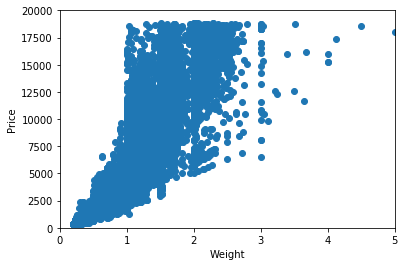

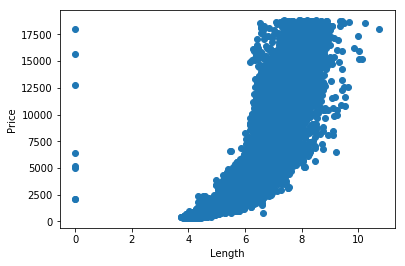

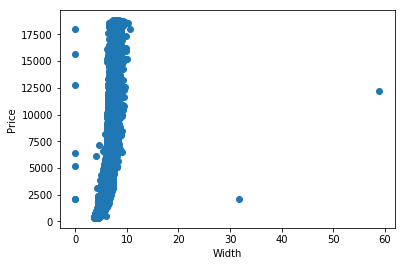

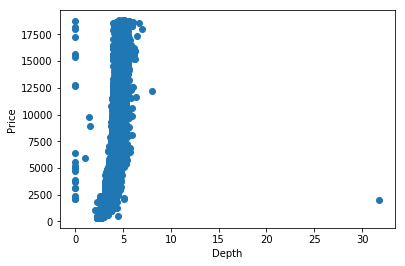

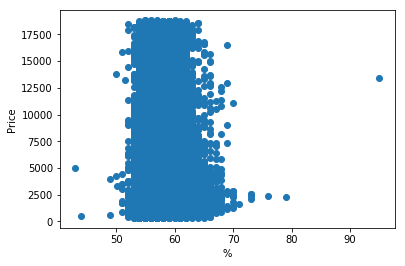

(None, None, None, None, None)

In [9]:
carat(), lenght(), width(), depth(), table()

All the predict variables to possues a positive relationship with target variable.

The width and depth vars possues similar relationship with target.
The weight and leight vars possues similar relationship with target.
The var 'Table' has a strange relationship with target.

Analyzing the relationship, the perfect diamond not necessary must be the biggest, or the heaviest.
The perfect diamond can be a little brilliant rocket.

In [10]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
18385,0.26,Ideal,F,VS1,62.1,54.0,618,4.12,4.13,2.56
19202,1.56,Fair,I,SI1,64.6,62.0,7950,7.26,7.23,4.68
24648,1.50,Very Good,H,IF,63.0,59.0,12988,7.23,7.30,4.58
40233,0.39,Premium,D,VS1,61.7,59.0,1123,4.69,4.64,2.88
17870,1.50,Fair,H,SI1,65.9,56.0,7211,7.11,7.04,4.66


C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


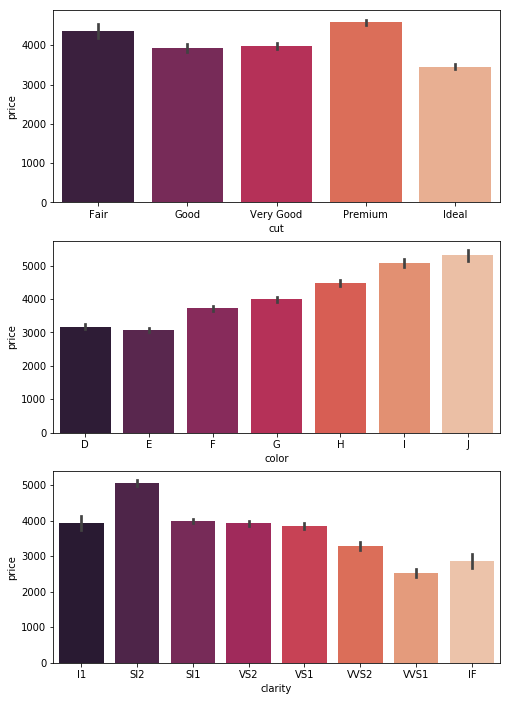

In [11]:
fig, ax = plt.subplots(3, figsize=(8,12))

# Barplot about the Price x Categories variables
sea.barplot(x="cut", y="price", palette="rocket", data=df, order=['Fair','Good','Very Good','Premium','Ideal'], ax = ax[0])
sea.barplot(x="color", y="price", palette="rocket", data=df, order=['D','E','F','G','H','I','J'], ax = ax[1])
sea.barplot(x="clarity", y="price", palette="rocket", data=df, order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], ax= ax[2])


A Fair diamond does not mean that it will have low prices, on the contrary, the diamonds with the worst cuts represented the highest values
While the ideal cut diamonds, represented the lowest values.
It can be said that the variable cut is heavily dependent on other diamond characteristics to get a good price
On the contrary, the variable color has a great weight on the price of the jewelry, since it is notorious the increase of the price from the types of color.
As for the variability clarity, SI2 showed to be triggered the variable in which is desirable in the stones, whereas WS1 have a smaller economic value.

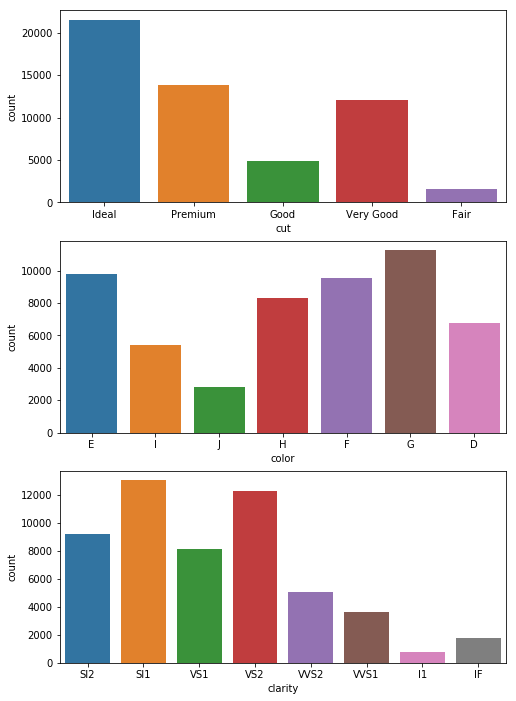

In [12]:
# Number of observations about Categories variables

fig, ax1 = plt.subplots(3, figsize=(8,12))

sea.countplot('cut', data=df, ax=ax1[0])
sea.countplot('color', data=df, ax = ax1[1])
sea.countplot('clarity', data=df, ax=ax1[2])

In general, the highest percentage of cut, Ideal, Premmium and Very Good
The highest frequency of colors is in the classification G, E, F, while the colors J, I, are rarer and explaining perhaps their higher prices.
The clarity SI1 and VS2 has greater occurrence in the dataset, being those of greater value.

Text(0.5, 1.0, 'Price distribution')

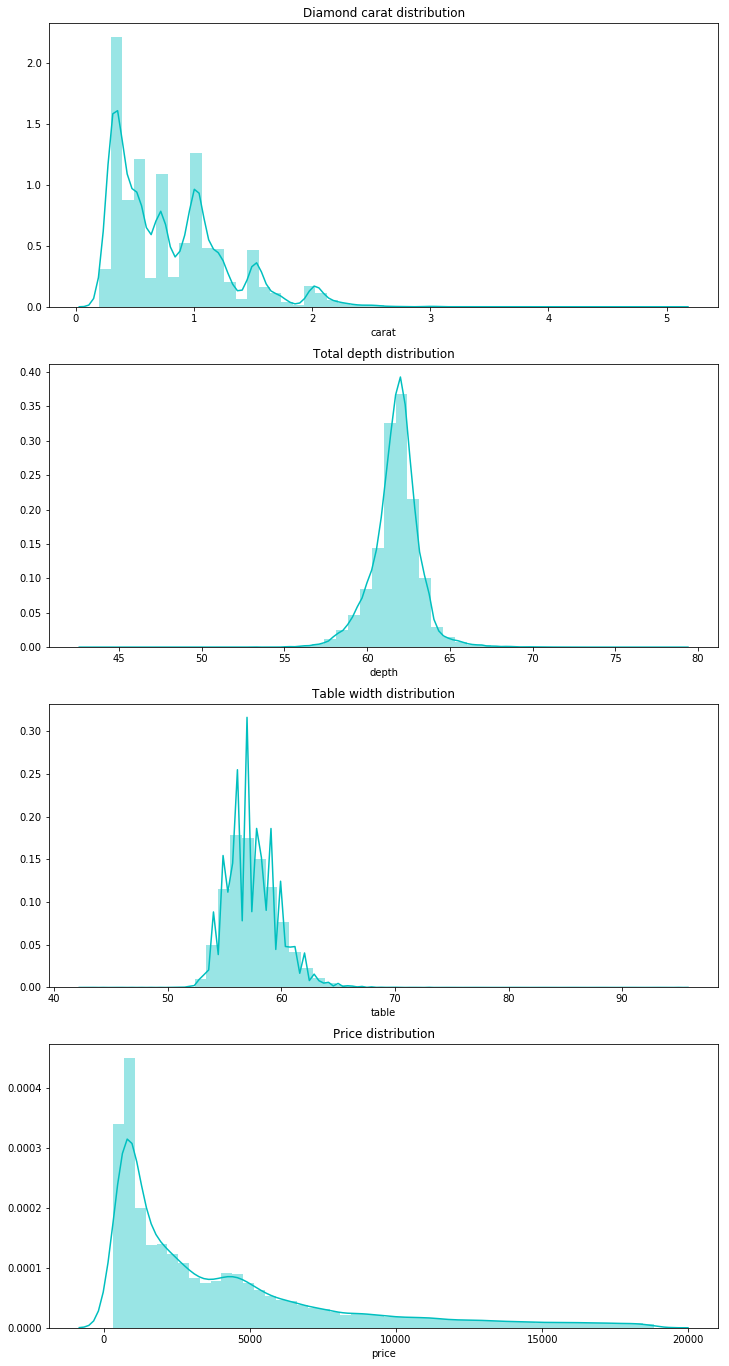

In [13]:
# Plotting distribution of variables

f, ax = plt.subplots(4, figsize=(12,24))

sea.distplot(df.carat,color='c',ax=ax[0])
sea.distplot(df.depth,color='c',ax=ax[1])
sea.distplot(df.table,color='c',ax=ax[2])
sea.distplot(df.price,color='c',ax=ax[3])
ax[0].set_title('Diamond carat distribution')
ax[1].set_title('Total depth distribution')
ax[2].set_title('Table width distribution')
ax[3].set_title('Price distribution')

Text(0, 0.5, 'Price')

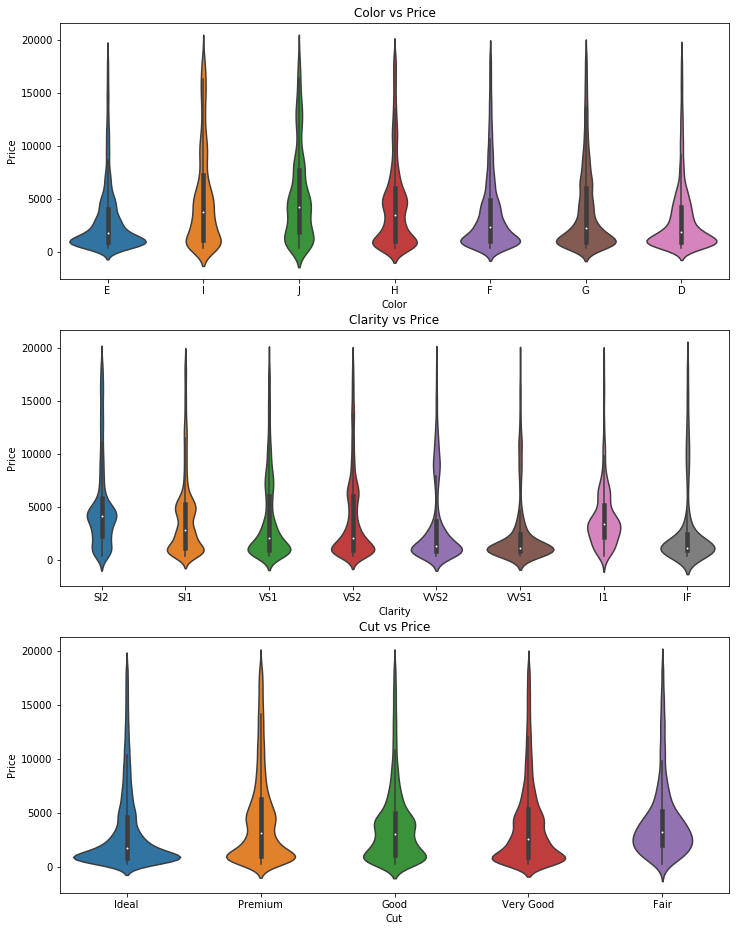

In [14]:
fig, ax = plt.subplots(3, figsize=(12,16))

sea.violinplot(x='color', y='price', data=df, ax=ax[0])
sea.violinplot(x='clarity', y='price', data=df, ax=ax[1])
sea.violinplot(x='cut', y='price', data=df, ax=ax[2])

ax[0].set_title('Color vs Price')
ax[1].set_title('Clarity vs Price')
ax[2].set_title('Cut vs Price')

ax[0].set_xlabel('Color')
ax[1].set_xlabel('Clarity')
ax[2].set_xlabel('Cut')

ax[0].set_ylabel('Price')
ax[1].set_ylabel('Price')
ax[2].set_ylabel('Price')

In relation to color, it is evident the smaller dispersion of the data in color J and I, making this type of color have higher values. While colors D and E, they have a high dispersion and a low average price.
In relation to clarity, the higher price of SI2 and SI1 stones is evident. It is noteworthy to note that diamonds I1 have a fairly high average. Since WS1 and IF are the lowest prices
In relation to cut, the Fair has higher value, while those considered Ideal, the lowest values.

In [15]:
# v1_Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X.color = le.fit_transform(X.color)
X.cut = le.fit_transform(X.cut)
X.clarity = le.fit_transform(X.clarity)


In [20]:
X2 = X.copy()
Y2 = Y.copy()

# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.15)

In [22]:
# Importing LInear Regressor Models

#Ridge, Lasso, Linear

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score

# Stantard Scalar
from sklearn.preprocessing import StandardScaler

In [19]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
print('Linear regression accuracy: ', linear_regression.score(x_test,y_test))

ridge = Ridge(normalize=True)
ridge.fit(x_train,y_train)
print('Ridge regression accuracy: ',ridge.score(x_test,y_test))

lasso = Lasso(normalize=True, max_iter=5000)
lasso.fit(x_train,y_train)
print('Lasso regression accuracy: ',ridge.score(x_test,y_test))

elastic_net = ElasticNet()
elastic_net.fit(x_train,y_train)
print('Elastic net accuracy: ',elastic_net.score(x_test,y_test))

Linear regression accuracy:  0.8864824857743824
Ridge regression accuracy:  0.7846804554896409
Lasso regression accuracy:  0.7846804554896409
Elastic net accuracy:  0.7952152315927004


In [24]:
# Standard Scaler()


standar = StandardScaler()
standar.fit(x_train2)
standar.transform(x_train2)

C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-1.02839171,  0.43470319, -0.35043641, ..., -1.12190059,
        -1.12649863, -1.28134974],
       [-0.54293903,  1.40935751, -0.35043641, ..., -0.43592717,
        -0.42078037, -0.47648981],
       [-0.16301954,  0.43470319, -0.93826647, ...,  0.05405385,
         0.01484818,  0.01772243],
       ...,
       [ 2.5597368 ,  0.43470319,  1.41305377, ...,  2.00506919,
         1.92290124,  2.05105277],
       [ 2.53863016,  1.40935751, -0.93826647, ...,  2.24560532,
         2.25397894,  1.79688648],
       [-0.60625894,  1.40935751,  0.23739365, ..., -0.56064961,
        -0.52533123, -0.50473051]])

In [25]:
linear_regression = LinearRegression()
linear_regression.fit(x_train2,y_train2)
print('Linear regression accuracy: ', linear_regression.score(x_test2,y_test2))

ridge = Ridge(normalize=True)
ridge.fit(x_train2,y_train2)
print('Ridge regression accuracy: ',ridge.score(x_test2,y_test2))

lasso = Lasso(normalize=True, max_iter=5000)
lasso.fit(x_train2,y_train2)
print('Lasso regression accuracy: ',ridge.score(x_test2,y_test2))

elastic_net = ElasticNet()
elastic_net.fit(x_train2,y_train2)
print('Elastic net accuracy: ',elastic_net.score(x_test2,y_test2))

Linear regression accuracy:  0.8803149781883461
Ridge regression accuracy:  0.7943630876651684
Lasso regression accuracy:  0.7943630876651684
Elastic net accuracy:  0.8046516082607096
